In [1]:
pip install ucimlrepo

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [2]:
from ucimlrepo import fetch_ucirepo

rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

print(rice_cammeo_and_osmancik.metadata)

print(rice_cammeo_and_osmancik.variables)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

In [4]:
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

y = y['Class'].map({'Cammeo': 0, 'Osmancik': 1})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Размерность X:", X_scaled.shape)
X.head()


Размерность X: (3810, 7)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024


In [5]:
input_dim = X_scaled.shape[1]
encoding_dim = 2

input_layer = Input(shape=(input_dim,))
encoded = Dense(6, activation='relu')(input_layer)
bottleneck = Dense(encoding_dim, activation='linear')(encoded)
decoded = Dense(6, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder_2d = Model(inputs=input_layer, outputs=output_layer)
encoder_2d = Model(inputs=input_layer, outputs=bottleneck)

autoencoder_2d.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

history_2d = autoencoder_2d.fit(X_scaled, X_scaled,
                                epochs=100,
                                batch_size=64,
                                verbose=0)

X_encoded_2d = encoder_2d.predict(X_scaled)


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


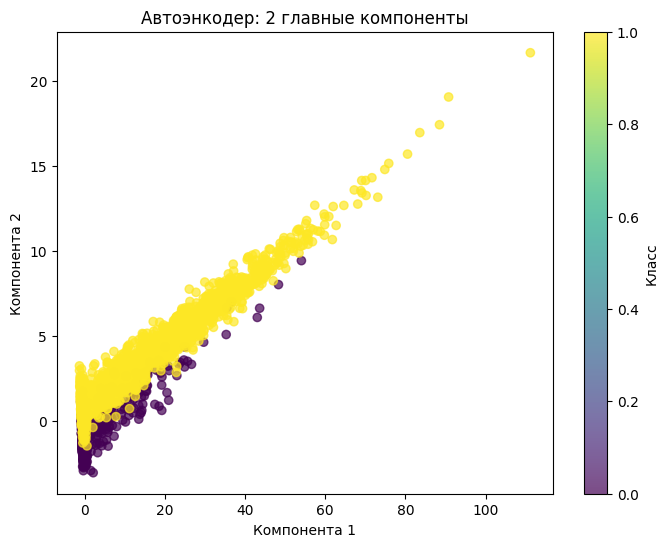

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded_2d[:, 0], X_encoded_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('Автоэнкодер: 2 главные компоненты')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.colorbar(label='Класс')
plt.show()


In [7]:
encoding_dim = 3

input_layer = Input(shape=(input_dim,))
encoded = Dense(6, activation='relu')(input_layer)
bottleneck = Dense(encoding_dim, activation='linear')(encoded)
decoded = Dense(6, activation='relu')(bottleneck)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder_3d = Model(inputs=input_layer, outputs=output_layer)
encoder_3d = Model(inputs=input_layer, outputs=bottleneck)

autoencoder_3d.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

history_3d = autoencoder_3d.fit(X_scaled, X_scaled,
                                epochs=100,
                                batch_size=64,
                                verbose=0)

X_encoded_3d = encoder_3d.predict(X_scaled)


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


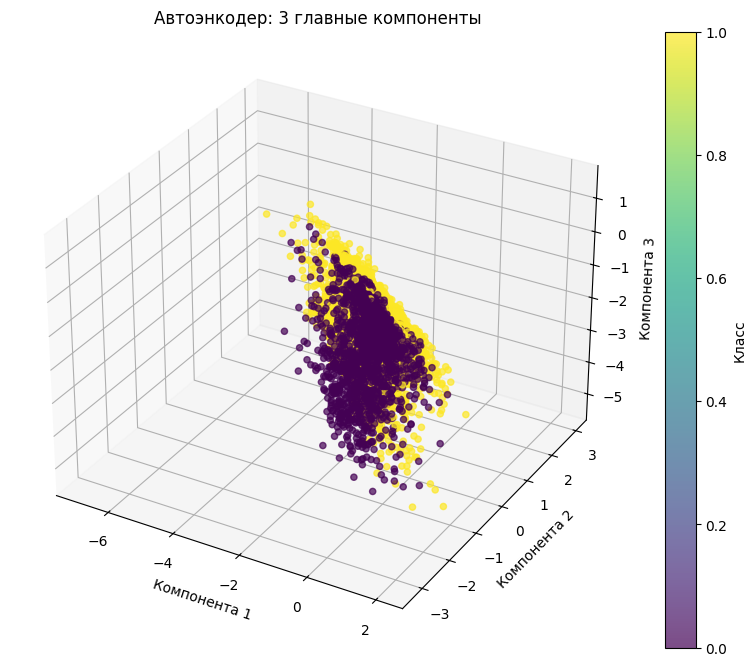

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_encoded_3d[:, 0], X_encoded_3d[:, 1], X_encoded_3d[:, 2],
                c=y, cmap='viridis', alpha=0.7)
ax.set_title('Автоэнкодер: 3 главные компоненты')
ax.set_xlabel('Компонента 1')
ax.set_ylabel('Компонента 2')
ax.set_zlabel('Компонента 3')
fig.colorbar(sc, label='Класс')
plt.show()


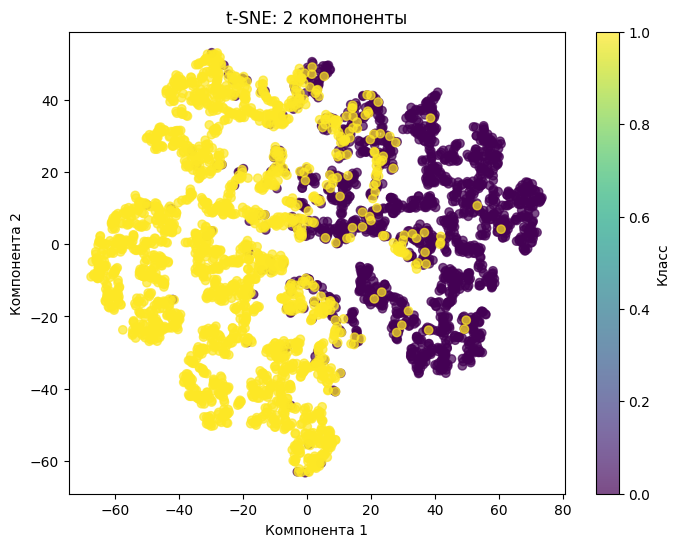

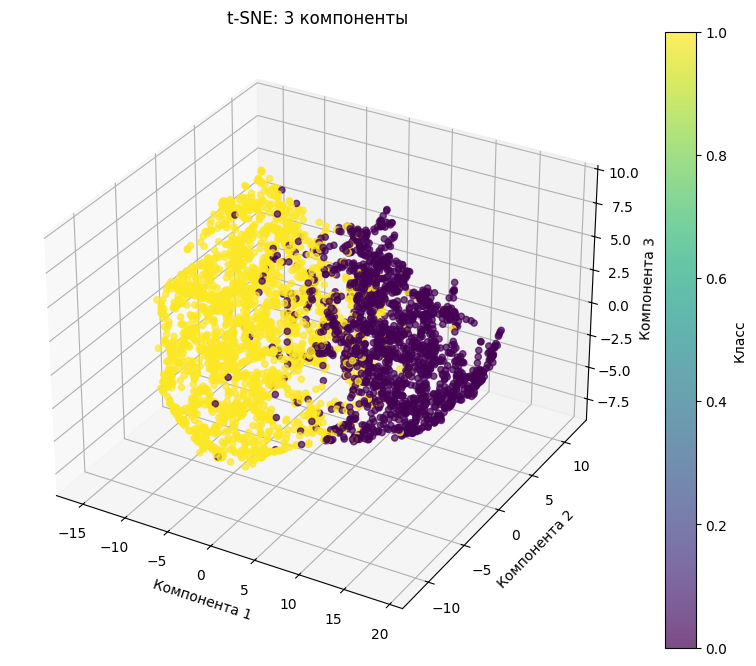

In [9]:
tsne_2d = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne_2d = tsne_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('t-SNE: 2 компоненты')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.colorbar(label='Класс')
plt.show()

tsne_3d = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
                c=y, cmap='viridis', alpha=0.7)
ax.set_title('t-SNE: 3 компоненты')
ax.set_xlabel('Компонента 1')
ax.set_ylabel('Компонента 2')
ax.set_zlabel('Компонента 3')
fig.colorbar(sc, label='Класс')
plt.show()


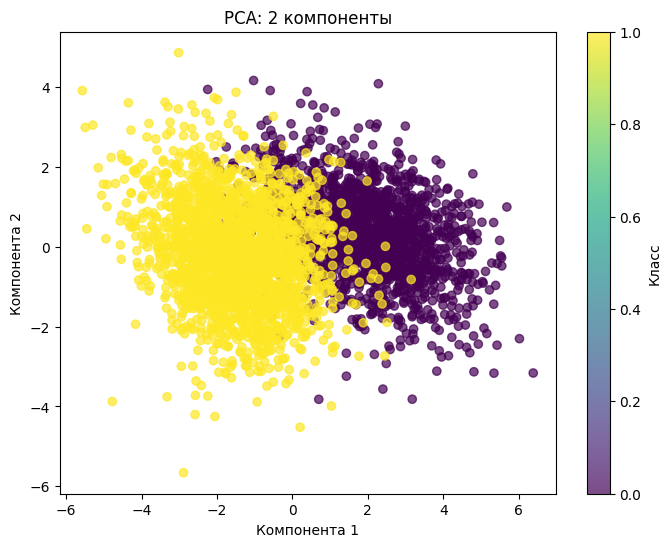

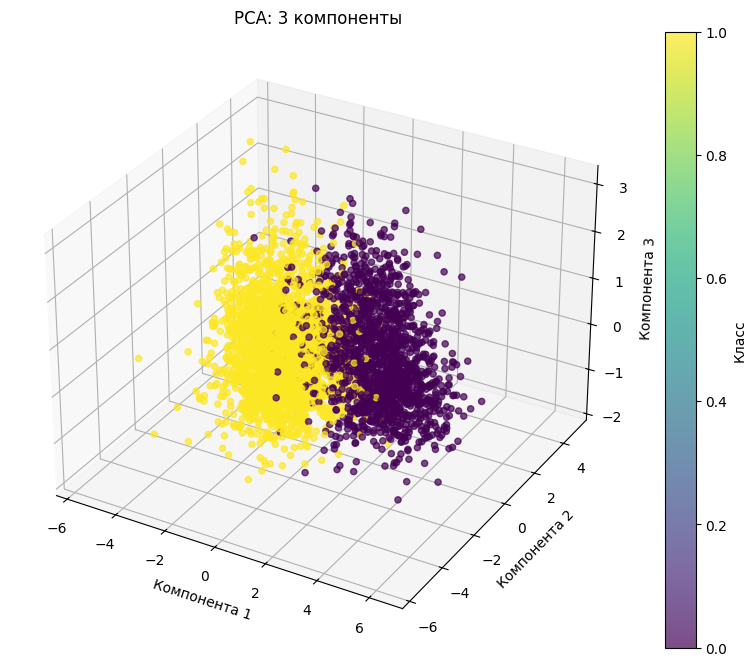

In [10]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA: 2 компоненты')
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.colorbar(label='Класс')
plt.show()

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                c=y, cmap='viridis', alpha=0.7)
ax.set_title('PCA: 3 компоненты')
ax.set_xlabel('Компонента 1')
ax.set_ylabel('Компонента 2')
ax.set_zlabel('Компонента 3')
fig.colorbar(sc, label='Класс')
plt.show()
